<table bgcolor=#ffffff align="center" width="100%" noborder>
    <tr>
        <td align="left" width="30%"><img src="images/IST_logo.png" width="50%"></td>
        <td width="40%"></td>
        <td align="right" width="30%"><img src="images/ds_logo.png" width="25%"></td>
    </tr>
    <tr><td align="left" width="30%"></td>
        <td width="40%"><p align="center"><img src="images/title.png"</td>
        <td align="right" width="30%"></td>
    </tr>
</table>

<h1 align="center" style="font-family:Arial;color:#6c6c6c;font-size:30px;">Lab 3: Classification (cont.)</h1>

<h2 style="font-family:Arial;color:#6c6c6c;font-size:25px;">KNN</h2>

<strong>KNN</strong> is possibly the second most famous classification technique, also very simple and easy to apply.

It doesn't create a model, and whenever we need to classify a new record, it chooses the <i>n</i> most similar (closest)
records to the given one, call them <strong>neighbors</strong>, and classifies the new one as the majority of its 
neighbors.

Naturally, the number of neighbors to consider, call it <i>n</i>, is one of the parameters of any implementation of KNN. 
<code>KNeighborsClassifier</code> receives <i>n</i> through the <code>n_neighbors</code> parameter. Another important
parameter is the distance function to use to choose the neighbors - <code>metric</code> is the parameter to use, and it 
can be <i>manhattan</i>, <i>euclidean</i> or <i>chebyshev</i>, among others.

Given the importance of these parameters, we need to choose them carefully, which means we need to try different ones
and understand how they impact on the quality of the results.

Next, we can see the results achieved by a set of parameters combinations.

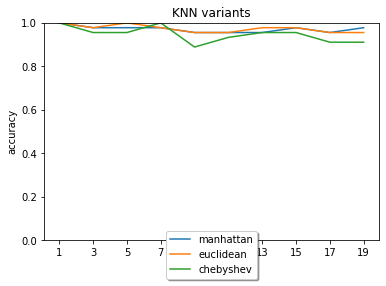

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
%load functions.ipynb
import ipynb.fs.defs.functions as func

data: pd.DataFrame = pd.read_csv('data/iris.csv')
y: np.ndarray = data.pop('class').values
X: np.ndarray = data.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
dist = ['manhattan', 'euclidean', 'chebyshev']
values = {}
for d in dist:
    yvalues = []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(trnX, trnY)
        prdY = knn.predict(tstX)
        yvalues.append(metrics.accuracy_score(tstY, prdY))
    values[d] = yvalues

plt.figure()
func.multiple_line_chart(plt.gca(), nvalues, values, 'KNN variants', 'n', 'accuracy', percentage=True)
plt.show()

<table bgcolor=#ffffff align="center" width="100%" noborder>
    <tr>
        <td align="center" width="30%"><a href="Lab31_naivebayes.ipynb"><img src="images/prev.png"></a></td>
        <td width="40%"></td>
        <td align="center" width="30%"><a href="Lab33_trees.ipynb"><img src="images/next.png"></a></td>
    </tr>
</table>